In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker  
%matplotlib inline

 Выбранные данные (houses_to_rent_v2.csv) отражают стоимость аренды домов в Бразилии.   Этот набор данных содержит 10692 дома для аренды с 13 различными характеристиками. 
 city - город, в котором находится недвижимость;
 area - площадь; rooms - количество комнат;  bathroom - количество ванных комнат;
 parking spaces - количество мест для парковки; floor - количество этажей; animal - разрешены ли животные; furniture - наличие мебели; hoa - стоимость налога домовладельцев; rent amount - стоимость арендной платы; property tax - стоимость имущественного налога; Fire Insurance - стоимость страховка от пожара; total - конечная стоимость аренды жилья
 

In [4]:
data = pd.read_csv('./houses_to_rent_v2.csv', index_col =False)
data.head()

city  area  rooms  bathroom  parking_spaces floor     animal  \
0     São Paulo    70      2         1               1     7      acept   
1     São Paulo   320      4         4               0    20      acept   
2  Porto Alegre    80      1         1               1     6      acept   
3  Porto Alegre    51      2         1               0     2      acept   
4     São Paulo    25      1         1               0     1  not acept   

       furniture   hoa  rent_amount  property_tax  fire_insurance  total  
0      furnished  2065         3300           211              42   5618  
1  not furnished  1200         4960          1750              63   7973  
2  not furnished  1000         2800             0              41   3841  
3  not furnished   270         1112            22              17   1421  
4  not furnished     0          800            25              11    836

Стоимость аренды дома относительно количества комнат

Text(0.5, 1.0, 'Price by city')

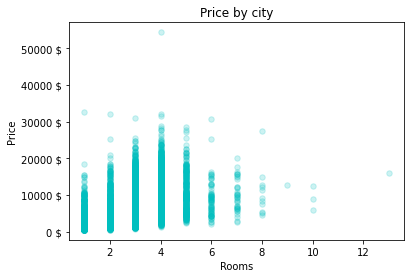

In [7]:
new_data=data[data.total < 60000]
city_data = new_data.rooms.values
total_data = new_data.total.values
plt.scatter(city_data, total_data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Price by city')

Можно отметить, что больше всего домов площадью менее 250. С увелечением площади растет и цена. 

Text(0.5, 1.0, 'Price by area')

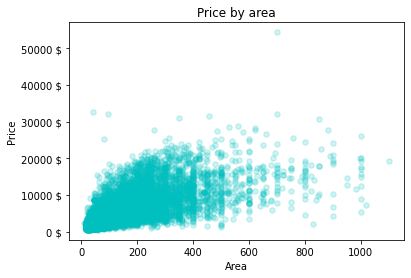

In [15]:
new_data=data[(data.area < 1250) & (data.total < 60000)]
city_data = new_data.area.values
total_data = new_data.total.values
plt.scatter(city_data, total_data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price by area')

Больше всего домов сдается в Sao Paulo.

Text(0.5, 1.0, 'Count house in diffetent city')

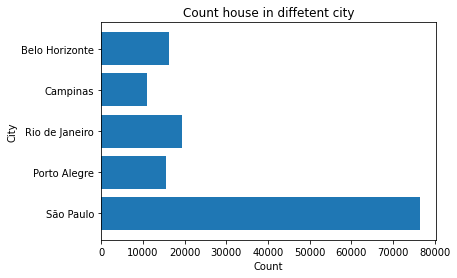

In [16]:
city_data_count = []
city_data = pd.unique(data.city)
for city in city_data:
    city_data_count.append(data[data.city == city].size)
plt.barh(city_data, city_data_count)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count house in diffetent city')

Средняя цена за дом с одной комнатой площадью больше 50 и меньше 100 по городам. 

city
Belo Horizonte    2326.000000
Campinas          2010.400000
Porto Alegre      2031.184615
Rio de Janeiro    3087.202532
São Paulo         4348.251852
Name: total, dtype: float64

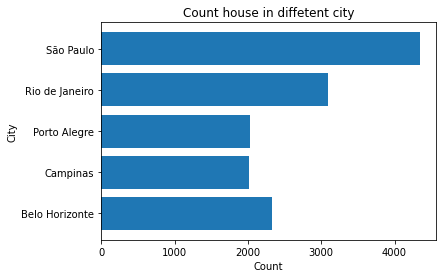

In [17]:

new_data=data[(data.rooms ==1) & (data.area > 50) & (data.area < 100)]
total_by_city= new_data.groupby('city')['total'].mean()
plt.barh(total_by_city.keys(), total_by_city)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count house in diffetent city')
total_by_city

Стоимость в São Paulo на 27% ниже, если арендовать дом площадью больше 50 и меньше 100 с двумя комнатами, нежели одной.

city
Belo Horizonte    1989.472637
Campinas          1929.046243
Porto Alegre      2075.681250
Rio de Janeiro    3391.065693
São Paulo         3403.496774
Name: total, dtype: float64

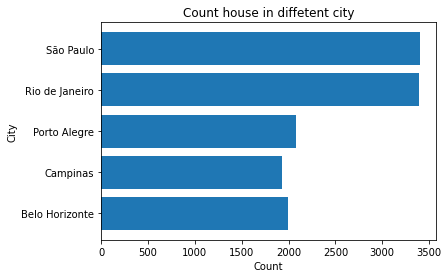

In [18]:
new_data=data[(data.rooms ==2) & (data.area > 50) & (data.area < 100)]
total_by_city= new_data.groupby('city')['total'].mean()
plt.barh(total_by_city.keys(), total_by_city)
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Count house in diffetent city')
total_by_city

 График имущественого налога относительно площади

Text(0, 0.5, 'Property tax')

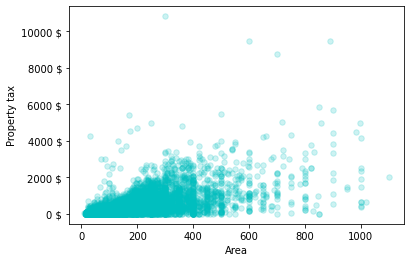

In [19]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
city_data = new_data.area.values
total_data = new_data.property_tax.values
plt.scatter(city_data, total_data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Area')
plt.ylabel('Property tax')

 График налога домовладельцев относительно площади

Text(0, 0.5, 'Property tax')

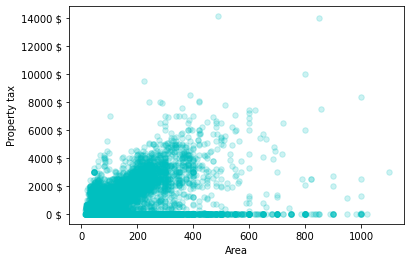

In [20]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
city_data = new_data.area.values
data = new_data.hoa.values
plt.scatter(city_data, data, alpha=0.2, c='c', s=30)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.xlabel('Area')
plt.ylabel('Property tax')

Line Regression 

Линейная регрессия некоторой зависимой переменной y на набор независимых переменных  x = (x₁, …, xᵣ), где r – это число предсказателей, предполагает, что линейное отношение между y и x: y = 𝛽₀ + 𝛽₁x₁ + ⋯ + 𝛽ᵣxᵣ + 𝜀. Это уравнение регрессии. 𝛽₀, 𝛽₁, …, 𝛽ᵣ – коэффициенты регрессии, и 𝜀 – случайная ошибка.

Линейная регрессия вычисляет оценочные функции коэффициентов регрессии или просто прогнозируемые весы измерения, обозначаемые как b₀, b₁, …, bᵣ. Они определяют оценочную функцию регрессии f(x) = b₀ + b₁x₁ + ⋯ + bᵣxᵣ. Эта функция захватывает зависимости между входами и выходом достаточно хорошо.

Для каждого результата наблюдения i = 1, …, n, оценочный или предсказанный ответ f(xᵢ) должен быть как можно ближе к соответствующему фактическому ответу yᵢ. Разницы yᵢ − f(xᵢ) для всех результатов наблюдений называются остатками. Регрессия определяет лучшие прогнозируемые весы измерения, которые соответствуют наименьшим остаткам.

Для получения лучших весов, вам нужно минимизировать сумму остаточных квадратов (SSR) для всех результатов наблюдений: SSR = Σᵢ(yᵢ − f(xᵢ))². Этот подход называется методом наименьших квадратов.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNetCV
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

R2 = r2_score(y_true, y_pred)
Коэффициент детерминации показывает, какую долю дисперсии (разнообразия ответов) во всем целевом векторе модель смогла объяснить насколько модель соответствует данным.
0≤𝑅2≤1,
𝑅=1–идеальная модель(функциональная зависимость между переменными);
𝑅=0–оптимальная «константная» модель (возвращает всегда среднее значение ответов y для объектов обучающей выборки);𝑅<0–такие модели не стоит рассматривать.

In [22]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
x = new_data.area.values
y = new_data.property_tax.values
# Делаем модель линейной регрессии
model = LinearRegression()
# ... и обучаем её 
model.fit(x.reshape(-1, 1), y)

# просмотр параметров модел
print('LinearRegression')
print('model_coef: ', model.coef_)
print('model_intercept: ', model.intercept_)

# Нарисуем график с обучающими данными и моделью
demo_x = x
demo_y = model.predict(demo_x.reshape(-1, 1))

plt.figure(figsize = (9, 6))
plt.scatter(x, y, label = 'Area')
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.plot(demo_x, demo_y, color = 'r', label = 'OLS Linear regression')
plt.xlabel('mean')
plt.ylabel('std')
plt.title('Sensor readings analysis')
# plt.legend()


print('r2_score: ',r2_score(y, demo_y))
print('mse: ', mean_squared_error(y, demo_y))
print('rmse: ', np.sqrt(mean_squared_error(y, demo_y)))

print('----------------------------------------------------')
# Elastic Net Regression
model = ElasticNet(alpha=91.265996, l1_ratio=0.500000)
# ... и обучаем её 
model.fit(x.reshape(-1, 1), y)

# просмотр параметров модели
print('ElasticNet')
print('model_coef: ', model.coef_)
print('model_intercept: ', model.intercept_)

# Нарисуем график с обучающими данными и моделью
demo_x = x
demo_y = model.predict(demo_x.reshape(-1, 1))

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d $'))
plt.plot(demo_x, demo_y, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()


print('r2_score: ',r2_score(y, demo_y))
print('mse: ', mean_squared_error(y, demo_y))
print('rmse: ', np.sqrt(mean_squared_error(y, demo_y)))

AttributeError: 'numpy.ndarray' object has no attribute 'area'

Визуально видно, что данные регресии подходят, для того чтобы убедиться в этом посторим гистограмму и оценим ее 'нормальность'. Так же линейная регрессия и ElasticNet совпали (ElasticNet модификации обычной линейной регрессии), это означает, что ее дополнительные штрафы не дали преимущества 

<AxesSubplot:ylabel='Count'>

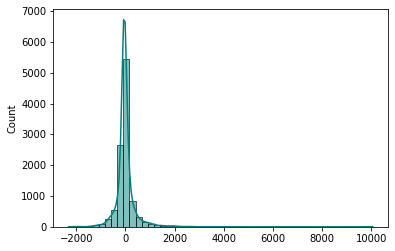

In [10]:
errors = y - demo_y
sns.histplot(errors, color="teal", kde=True, bins=50)

Elastic Net Regression

Эластичная сеть — это гибрид методов регрессии лассо и гребневой регрессии. Она использует как L1, так и L2 регуляризации, учитывая эффективность обоих методов.
min || Xw — y ||² + z_1|| w || + z_2|| w ||²
Практическим преимуществом использования регрессии лассо и гребневой регрессии является то, что это позволяет эластичной сети наследовать некоторую стабильность гребневой регрессии при вращении.

<AxesSubplot:ylabel='Count'>

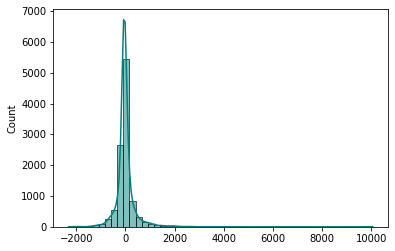

In [11]:
errors = y - demo_y
sns.histplot(errors, color="teal", kde=True, bins=50)

In [12]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = np.arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 100.0]
model = ElasticNetCV(cv=cv, n_jobs=-1)
# fit model
model.fit(x.reshape(-1, 1), y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

alpha: 91.265996
l1_ratio_: 0.500000


Попробуем обучить наши выборки. Используем отложенную выборку. Отложенная выборка – часть данных из выборки не участвуют в обучении, а позже на них проверяют обученный алгоритм. Преимущество отложенной выборки – обучать алгоритм нужно 1 раз.Но результат сильно зависит от того, как было произведено разбиение. Однако если не правильно разбить выборку, то результат будет некорректным. Алгоритм может обучиться на данных одного типа, а примениться к другим.

R2:  0.43265464008235865
R2:  0.4325699151742779


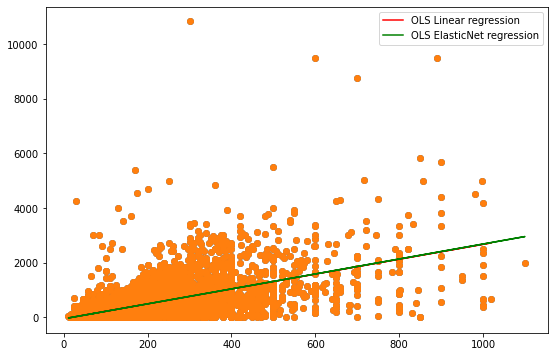

In [13]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
x = new_data.area.values
y = new_data.property_tax.values

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size = 0.33, random_state = 56)


model = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x_test, y_pred, color = 'r', label = 'OLS Linear regression')
plt.legend()

print('R2: ', r2_score(y_test, y_pred))

model = ElasticNet(alpha=91.265996, l1_ratio=0.500000).fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test)

plt.scatter(x, y)
plt.plot(demo_x, demo_y, color = 'g', label = 'OLS ElasticNet regression')
plt.legend()

print('R2: ', r2_score(y_test, y_pred))

In [ ]:
Обучение дало незначительно преимущество нашим регрессиям

Приведем наши данные к нормальному распределению. Так как некоторые методы для анализа данных предпологают  работу с данными близкими к нормальному распределению. То есть из каждой точки надо вычесть среднее и поделить на дисперсию.

In [14]:
new_data=data[(data.area < 1250) & (data.total < 25000)]
x = new_data.area.values
y = new_data.property_tax.values

from sklearn.preprocessing import StandardScaler
Xscaled = StandardScaler().fit_transform(x.reshape(-1, 1))